# Crime Discount? <br> Does Crime Rate in the Neighborhood Affect NYC Property Sales </br> 
## Introduction
<p>New York City is famous for being one of the most expensive place to live in the world. Many people want to buy house here because of the job opportunities and culture. However, the price of property is not the same in every area. One big factor that can change the price is the level of safety. This project will look at the question does crime rate in the neighborhood affect NYC property sales?

Most people think that if a neighborhood has high crime, the house prices will be lower. This is what people often called a "crime discount". For example, if there is a lot of violent crime, buyers might be scared to live there. So, sellers have to lower the money they ask for. On the other hand, some areas in NYC are changing fast and prices go up even if crime is not zero.

This research will analyze data to find the truth about this relationship. It is important for buyers and the goverment to understand how safety connects to real estate value. By looking at the numbers, we can see if the crime rate really makes a big difference or if other things are more important.</p>

## About the Data
1. [311 Complaint](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243/about_data)<br>
The Complaint data size is too large. Therefore I made a query to get the data from 2018 - 2023. In addition, I only use several columns for this analysis that are:<br>
&nbsp; - Created Date <br>
&nbsp; - Law Category ID <br>
&nbsp; - Offense Description <br>
&nbsp; - Borough <br>


2. [NYC Property Sales](https://www.kaggle.com/datasets/datasciencedonut/current-nyc-property-sales/data)<br>
Since the original data starts from 2020 to 2023, I don't do any query for it. I use only three columns from it for the analysis such as:<br>
&nbsp; - Borough <br>
&nbsp; - Sales Date <br>
&nbsp; - Sales Price <br>

## Cleaning Up Process
### 311 Complaint Data



In [3]:
import pandas as pd

# Load the complaint dataset
complaint = pd.read_csv("NYPD_Complaint_Data.csv")
complaint = complaint.rename(
    columns={
        "BORO_NM": "BOROUGH",
        "CMPLNT_FR_DT": "CMPLNT_DATE",
        "CMPLNT_FR_TM": "CMPLNT_TIME",
    }
)
complaint

,CMPLNT_NUM,ADDR_PCT_CD,BOROUGH,CMPLNT_DATE,CMPLNT_TIME,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,312800297,123,STATEN ISLAND,01/01/2017,00:00:00,07/03/2025,23:59:00,COMPLETED,(null),NaN,...,NaN,<18,WHITE,F,914803,125922,40.512038,-74.249755,"(40.5120382535219, -74.2497549524458)",POINT (-74.2497549524458 40.5120382535219)
1,301107420,68,BROOKLYN,01/01/2017,12:00:00,12/31/2018,12:00:00,COMPLETED,(null),NaN,...,NaN,<18,WHITE HISPANIC,F,977947,172030,40.638865,-74.022712,"(40.6388651705916, -74.0227120876572)",POINT (-74.0227120876572 40.6388651705916)
2,301107418,68,BROOKLYN,01/01/2017,12:00:00,12/31/2018,12:00:00,COMPLETED,(null),NaN,...,NaN,<18,WHITE HISPANIC,F,977947,172030,40.638865,-74.022712,"(40.6388651705916, -74.0227120876572)",POINT (-74.0227120876572 40.6388651705916)
3,301589421,66,BROOKLYN,01/01/2017,00:00:00,12/31/2017,23:59:00,COMPLETED,(null),NaN,...,NaN,18-24,WHITE,F,986764,167283,40.625838,-73.990945,"(40.6258375452829, -73.9909448942322)",POINT (-73.9909448942322 40.6258375452829)
4,299929477,79,BROOKLYN,01/01/2017,00:00:00,01/31/2017,23:59:00,COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,999496,190300,40.689001,-73.945027,"(40.68900139556, -73.9450265328727)",POINT (-73.9450265328727 40.68900139556)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,307871662,61,BROOKLYN,12/28/2023,00:01:00,04/23/2025,00:01:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,F,1003092,156053,40.594996,-73.932153,"(40.594996, -73.932153)",POINT (-73.932153 40.594996)
1858,313275557,19,MANHATTAN,12/29/2023,12:00:00,06/11/2024,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,F,996910,222142,40.776404,-73.954288,"(40.776404, -73.954288)",POINT (-73.954288 40.776404)
1859,301609587,43,BRONX,12/29/2023,17:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE HISPANIC,F,1022756,239762,40.824692,-73.860869,"(40.824692, -73.860869)",POINT (-73.860869 40.824692)
1860,301589378,19,MANHATTAN,12/31/2023,18:39:00,12/31/2023,18:40:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,994845,216586,40.761159,-73.961755,"(40.761159, -73.961755)",POINT (-73.961755 40.761159)


In [4]:
# Checking datatypes of the dataset
complaint.dtypes

CMPLNT_NUM                   object
ADDR_PCT_CD                   int64
BOROUGH                      object
CMPLNT_DATE                  object
CMPLNT_TIME                  object
CMPLNT_TO_DT                 object
CMPLNT_TO_TM                 object
CRM_ATPT_CPTD_CD             object
HADEVELOPT                   object
HOUSING_PSA                 float64
JURISDICTION_CODE             int64
JURIS_DESC                   object
KY_CD                         int64
LAW_CAT_CD                   object
LOC_OF_OCCUR_DESC            object
OFNS_DESC                    object
PARKS_NM                     object
PATROL_BORO                  object
PD_CD                       float64
PD_DESC                      object
PREM_TYP_DESC                object
RPT_DT                       object
STATION_NAME                 object
SUSP_AGE_GROUP               object
SUSP_RACE                    object
SUSP_SEX                     object
TRANSIT_DISTRICT            float64
VIC_AGE_GROUP               

In [5]:
# Date collumn datatypes is string, we need to convert it to date
complaint["CMPLNT_DATE"] = pd.to_datetime(
    complaint["CMPLNT_DATE"], format="%m/%d/%Y", errors="coerce"
)

# Check Borough unique value
complaint["BOROUGH"].unique()


array(['STATEN ISLAND', 'BROOKLYN', 'BRONX', 'QUEENS', 'MANHATTAN',
       '(null)'], dtype=object)

In [6]:
# Keep only rows where BOROUGH is NOT '(null)'
complaint = complaint[complaint["BOROUGH"] != "(null)"]

# Verify it's gone
print(complaint["BOROUGH"].unique())

['STATEN ISLAND' 'BROOKLYN' 'BRONX' 'QUEENS' 'MANHATTAN']


In [7]:
# Selecting collumns to keep
collumn_to_keep = ["BOROUGH", "CMPLNT_DATE", "LAW_CAT_CD", "OFNS_DESC"]
complaint = complaint[collumn_to_keep]

#### Cleaned up Complaint Data

In [8]:
# Create new collumn called MONTH to groupby
complaint["MONTH"] = complaint["CMPLNT_DATE"].dt.to_period("M")

# Aggregating complaints by BOROUGH per MONTH in total
complaint_agg = (
    complaint.groupby(["BOROUGH", "MONTH"]).size().reset_index(name="TOT_CMPLNTS")
)
complaint_agg

,BOROUGH,MONTH,TOT_CMPLNTS
0,BRONX,2017-01,10
1,BRONX,2017-02,2
2,BRONX,2017-03,2
3,BRONX,2017-06,2
4,BRONX,2017-08,1
...,...,...,...
323,STATEN ISLAND,2023-08,7
324,STATEN ISLAND,2023-09,2
325,STATEN ISLAND,2023-10,5
326,STATEN ISLAND,2023-11,7


### NYC Property Sales Data

In [9]:
# Import kagglehub library
# The data is too big to load, therefore using kagglehub library is the most effective way
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("datasciencedonut/current-nyc-property-sales")

files = os.listdir(path)

csv_file = [f for f in files if f.endswith(".csv")][0]
full_file_path = os.path.join(path, csv_file)
nyc_prop_sales = pd.read_csv(full_file_path)
nyc_prop_sales.sample(3)

c:\Users\lugis\OneDrive\MPA_SIPA\03_Fall25\lugisz.github.io\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\lugis\AppData\Local\Temp\ipykernel_10164\3097583730.py:13: DtypeWarning: Columns (0,4,5,6,10,11,12,13,14,15,16,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_prop_sales = pd.read_csv(full_file_path)


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1149715,4,ROSEDALE,01 ONE FAMILY HOMES,1,13483,17,,A2,226-04 145TH AVENUE,,...,1.0,0.0,1.0,4000.0,1034.0,1950.0,1,A2,0,2009-12-07 00:00:00
914338,3,OCEAN HILL,03 THREE FAMILY HOMES,1,1503,19,,C0,816 MAC DONOUGH STREET,,...,3.0,0.0,3.0,2000.0,4400.0,1925.0,1,C0,280000,2012-07-24 00:00:00
1391423,2,WILLIAMSBRIDGE,02 TWO FAMILY HOMES,1,4838,28,,B1,741 EAST 224TH STREET,,...,2.0,0.0,2.0,2860.0,2735.0,1970.0,1,B1,545000,2006-03-30 00:00:00


In [10]:
nyc_prop_sales["BOROUGH"].unique()

array([1, 2, 3, 4, 5, '4', '5', 'BOROUGH', '1', '2'], dtype=object)

As we can see from output above, BOROUGH collumn contains mixed value of string and integer. To solve that, I replace codified values using its real name. Additionally, there are also some rows with "Borough" value in the data and I need to remove it.

In [11]:
borough_mapping = {
    "1": "MANHATTAN",
    "2": "BRONX",
    "3": "BROOKLYN",
    "4": "QUEENS",
    "5": "STATEN ISLAND",
    1: "MANHATTAN",
    2: "BRONX",
    3: "BROOKLYN",
    4: "QUEENS",
    5: "STATEN ISLAND",
}

nyc_prop_sales["BOROUGH"] = nyc_prop_sales["BOROUGH"].replace(borough_mapping)
nyc_prop_sales = nyc_prop_sales[nyc_prop_sales["BOROUGH"] != "BOROUGH"]
nyc_prop_sales["BOROUGH"].unique()

array(['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

In [12]:
collumn_to_use = ["SALE DATE", "SALE PRICE", "BOROUGH"]
nyc_prop_sales = nyc_prop_sales[collumn_to_use]
nyc_prop_sales.sample(3)

,SALE DATE,SALE PRICE,BOROUGH
1453300,2006-11-17 00:00:00,240000,QUEENS
854139,2013-12-12 00:00:00,498000,QUEENS
1461466,2006-09-01 00:00:00,615000,STATEN ISLAND


In [13]:
# The data has 0 on the sale price that needs to be drooped
# In addition the NaN data should also be dropped
nyc_prop_sales["SALE PRICE"] = pd.to_numeric(
    nyc_prop_sales["SALE PRICE"], errors="coerce"
)
nyc_prop_sales = nyc_prop_sales.dropna(subset=["SALE PRICE"])
nyc_prop_sales = nyc_prop_sales[nyc_prop_sales["SALE PRICE"] > 0]
nyc_prop_sales.sample(5)

,SALE DATE,SALE PRICE,BOROUGH
1963273,2023-11-21 00:00:00,282000,BRONX
50319,2022-09-15 00:00:00,1999995,BROOKLYN
1371700,2006-11-03 00:00:00,738231,MANHATTAN
1852842,2023-05-16 00:00:00,10,BROOKLYN
1359619,2006-07-14 00:00:00,385000,MANHATTAN


In [14]:
nyc_prop_sales.dtypes

SALE DATE     object
SALE PRICE     int64
BOROUGH       object
dtype: object

In [15]:
# Convert SALE PRICE from string to integer
nyc_prop_sales["SALE PRICE"] = pd.to_numeric(
    nyc_prop_sales["SALE PRICE"], errors="coerce"
)

# Convert SALE DATE from string to date
nyc_prop_sales["SALE DATE"] = pd.to_datetime(nyc_prop_sales["SALE DATE"])
nyc_prop_sales.sample(3)

,SALE DATE,SALE PRICE,BOROUGH
895290,2012-08-16,460000,BRONX
627786,2015-12-10,915000,MANHATTAN
748843,2014-08-22,224400,QUEENS


#### Cleaned Up NYC Property Sales Data

In [16]:
nyc_prop_sales["MONTH"] = nyc_prop_sales["SALE DATE"].dt.to_period("M")
nyc_prop_sales_agg = (
    nyc_prop_sales.groupby(["BOROUGH", "MONTH"])["SALE PRICE"].median().reset_index()
)
nyc_prop_sales_agg

,BOROUGH,MONTH,SALE PRICE
0,BRONX,2003-01,249000.0
1,BRONX,2003-02,244313.0
2,BRONX,2003-03,266000.0
3,BRONX,2003-04,229916.0
4,BRONX,2003-05,240000.0
...,...,...,...
1250,STATEN ISLAND,2023-07,640000.0
1251,STATEN ISLAND,2023-08,650000.0
1252,STATEN ISLAND,2023-09,648500.0
1253,STATEN ISLAND,2023-10,620000.0


#### Merging Complaint and Property Sales Data

In [17]:
merged = pd.merge(
    nyc_prop_sales_agg, complaint_agg, on=["BOROUGH", "MONTH"], how="inner"
)
merged

,BOROUGH,MONTH,SALE PRICE,TOT_CMPLNTS
0,BRONX,2017-01,380000.0,10
1,BRONX,2017-02,394416.0,2
2,BRONX,2017-03,390000.0,2
3,BRONX,2017-06,400000.0,2
4,BRONX,2017-08,410000.0,1
...,...,...,...,...
318,STATEN ISLAND,2023-07,640000.0,4
319,STATEN ISLAND,2023-08,650000.0,7
320,STATEN ISLAND,2023-09,648500.0,2
321,STATEN ISLAND,2023-10,620000.0,5


## Visualizations
### A. Sales Price Distribution by Borough

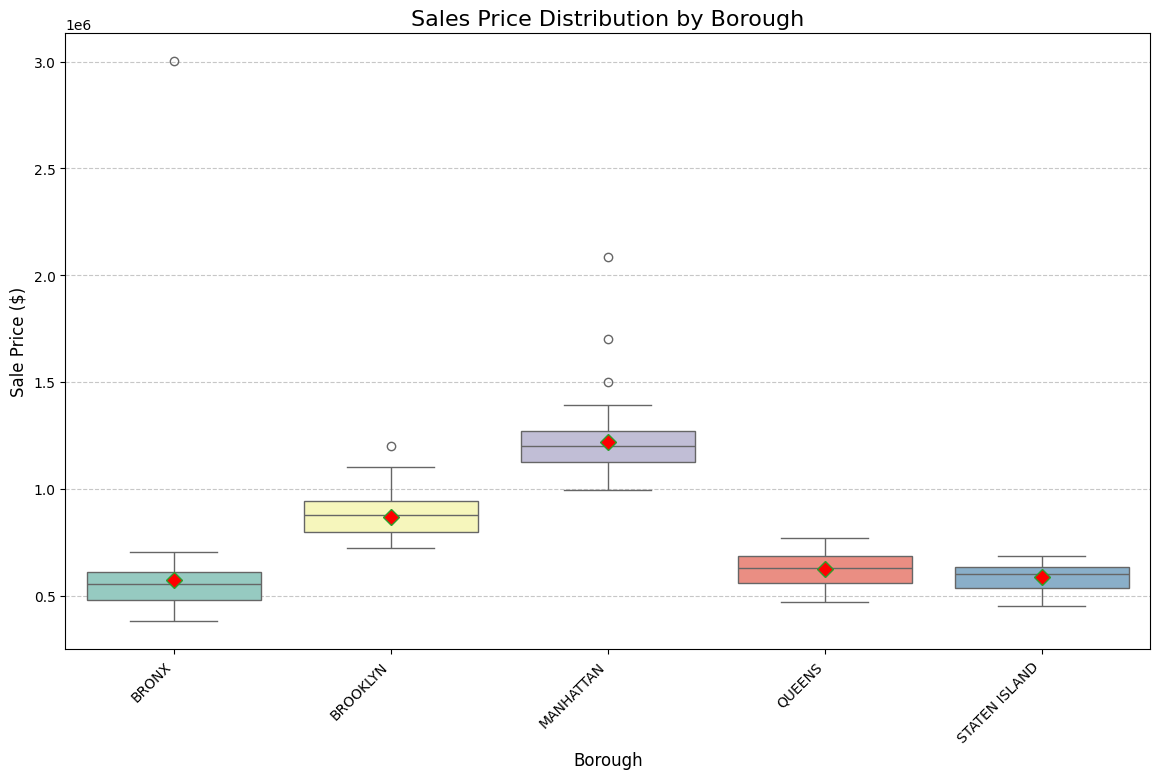

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=merged,
    x="BOROUGH",
    y="SALE PRICE",
    hue="BOROUGH",
    palette="Set3",
    legend=False,
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "red", "markersize": 8},
)


plt.title("Sales Price Distribution by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Sale Price ($)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### B. Median Sales Price by Borough

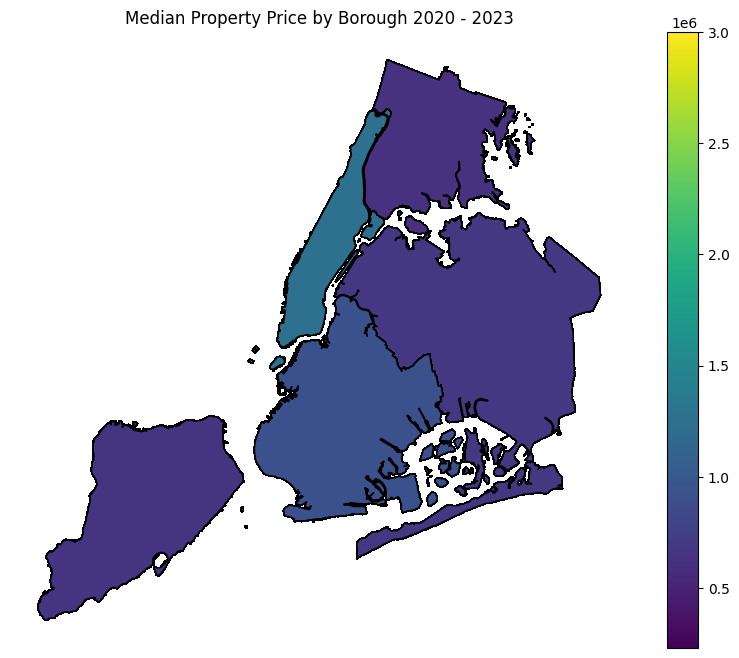

In [ ]:
import geopandas as gpd

nyc_geo_url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/new-york-city-boroughs.geojson"

nyc_prop_sales_map = gpd.read_file(nyc_geo_url)

# JSON data uses Title Case while this data uses Upper Case, code below is to match them
nyc_prop_sales_agg["BOROUGH"] = nyc_prop_sales_agg["BOROUGH"].str.title()

nyc_prop_sales_map = nyc_prop_sales_map.merge(
    nyc_prop_sales_agg, left_on="name", right_on="BOROUGH"
)


nyc_prop_sales_map.plot(
    column="SALE PRICE", cmap="viridis", legend=True, figsize=(10, 8), edgecolor="black"
)
plt.title("Median Property Price by Borough 2020 - 2023")
plt.axis("off")
plt.show()

In [ ]:
import folium

# --- 1. PREPARE THE DATA (Your existing logic) ---
# Ensure the casing matches (Upper Case -> Title Case)
nyc_prop_sales_agg["BOROUGH"] = nyc_prop_sales_agg["BOROUGH"].str.title()

# We still do the merge because we need it for the Tooltip later
merged_gdf = nyc_prop_sales_map.merge(
    nyc_prop_sales_agg, left_on="name", right_on="BOROUGH"
)

# --- 2. CREATE THE BASE MAP ---
# Centered on NYC
m = folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles="CartoDB positron")

# --- 3. ADD THE COLORED MAP (Choropleth) ---
choropleth = folium.Choropleth(
    geo_data=nyc_geo_url,  # The map shapes
    name="Median Sales Price",
    data=nyc_prop_sales_agg,  # The dataframe with the numbers
    columns=["BOROUGH", "SALE PRICE"],  # [Key Column, Value Column]
    key_on="feature.properties.name",  # Matches the JSON key for borough name
    fill_color="viridis",  # Same color scheme as your previous plot
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Median Property Price ($)",
).add_to(m)


# --- 5. DISPLAY ---
folium.LayerControl().add_to(m)
m

In [23]:
m.save("nyc_map.html")
print("Map saved! Look for nyc_map.html in your folder and open it.")

Map saved! Look for nyc_map.html in your folder and open it.


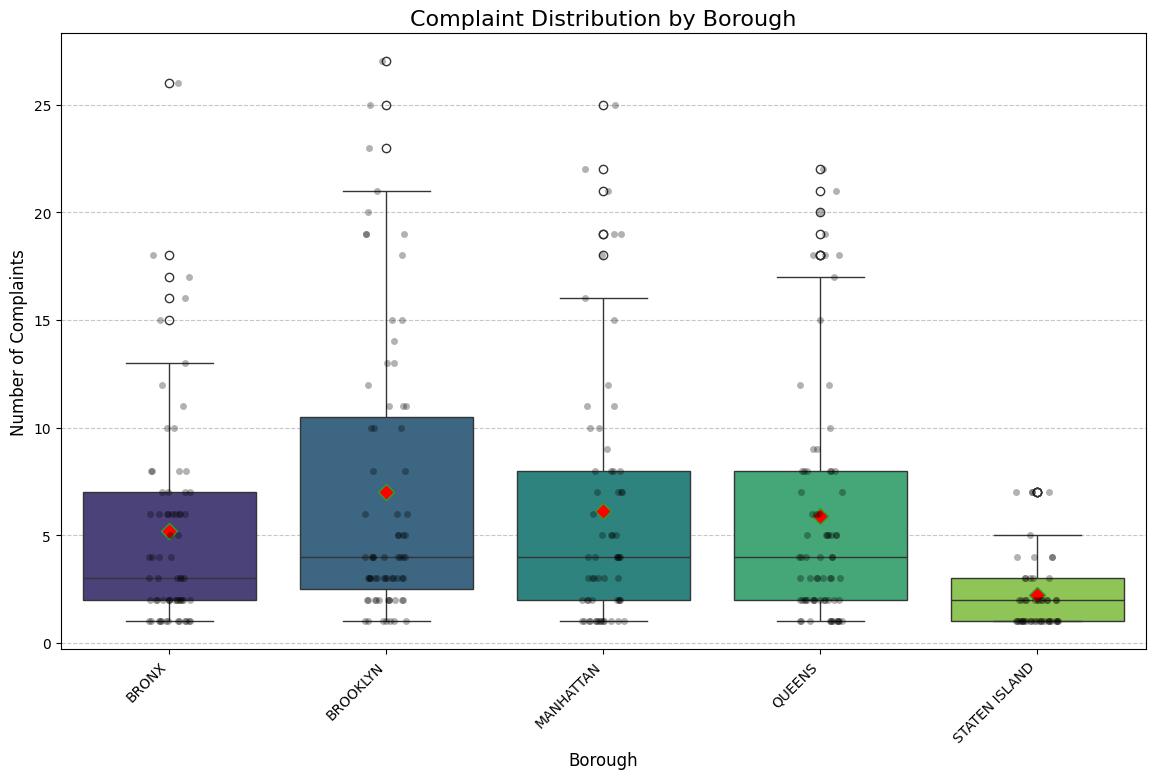

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=merged,
    x="BOROUGH",
    y="TOT_CMPLNTS",
    palette="viridis",
    hue="BOROUGH",
    showmeans=True,
    meanprops={"marker": "D", "markerfacecolor": "red", "markersize": 8},  #
)


plt.title("Complaint Distribution by Borough", fontsize=16)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)


sns.stripplot(
    x="BOROUGH", y="TOT_CMPLNTS", data=merged, color="black", alpha=0.3, jitter=True
)

plt.show()